**<font color='orange'>Procedure for Hypothesis Testing**
 
  <font color='green'>we have to understand Alternate Hypothesis (Bold claim)$$H_1$$
      Null Hypothesis (Ground Truth)$$H_0$$
  
  <font color='green'>Collect a sample of size n
      
  <font color='green'>Compute the mean from this sample$ \bar{x} $
  
  <font color='purple'>Computing Test Statistic:
  
  <font color='green'>If population variance is known$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

   If population variance is unknown$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

   Decide significance level  𝛼 . Lower  𝛼  means you need stronger evidence to reject Null Hypothesis.

 <font color='purple'>Apply decision rule:

<font color='purple'>If test statistic is z-score -

<font color='green'>Two tailed z-test:
$$|z|; z_\frac{\alpha}{2} \Rightarrow Accept Accept \ H_1 \ or \ Reject \ H_0$$
 
<font color='green'>Right tailed z-test:
$$z ; z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
 
<font color='green'>Left tailed z-test:
<font color='green'>$$z; -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
 
<font color='purple'>If test statistic is t-score

<font color='green'>Two tailed t-test:
<font color='green'>$$|t|; t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
 
<font color='green'>Right tailed t-test:
<font color='green'>$$t; t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
 
<font color='green'>Left tailed t-test:
<font color='green'>$$t; t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
 
<font color='purple'>Compute p-value  𝑃(𝑇𝑒𝑠𝑡 𝑆𝑡𝑎𝑡𝑖𝑠𝑡𝑖𝑐𝑠|𝐻0) 

<font color='purple'>For two tailed test: <font color='green'>$$𝑝 𝑣𝑎𝑙𝑢𝑒=2∗(1.0−𝑐𝑑𝑓(𝑡𝑒𝑠𝑡 𝑠𝑡𝑎𝑡𝑖𝑠𝑡𝑖𝑐))$$

<font color='purple'>For one tailed test: <font color='green'>$$𝑝 𝑣𝑎𝑙𝑢𝑒=(1.0−𝑐𝑑𝑓(𝑡𝑒𝑠𝑡 𝑠𝑡𝑎𝑡𝑖𝑠𝑡𝑖𝑐))$$
 
<font color='purple'>Now,
    
<font color='green'>if $$(p \ value; \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$


Alternate Hypothesis (Bold claim): $ \gt, \lt, \ \neq  $
Null Hypothesis (Status Quo): $ \leq, \ \geq, \ = $

Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet
has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their
claims and believe that on average each packet does not contain 500 grams of biryani.
How do you prove your claim? 

In [5]:
#importing All Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.stats import t
import math as m

each parcel packet$$H_1 \neq  500 grams$$

$$H_0 =  500 grams$$

In [7]:
smpls = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

In [8]:
def smpl_mean(smpls):
    smpl_mean = sum(smpls)/len(smpls)
    return smpl_mean
smpl_mean(smpls)

465.3

In [9]:

# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500

In [10]:
def smpl_std(smpls):
    smpl_mean = sum(smpls)/len(smpls)
    smpl_vrnce = 0
    for i in smpls:
        smpl_vrnce = smpl_vrnce + (smpl_mean - i)**2 
    smpl_vrnce = smpl_vrnce/(len(smpls)-1)
    smpl_std = m.sqrt(smpl_vrnce)
    return smpl_std
smpl_std(smpls)

86.84859110991827

In [11]:
# Calculating the t-score

def t_scr(smpl_mean,pop_mean,smpl_std,smpl_size):
    nmrt = smpl_mean-pop_mean
    dnmr = smpl_std/smpl_size**0.5
    return nmrt/dnmr
t_scr(465.3,500,86.84859110991827,10)

-1.2634751284446715

In [12]:
# Two tail
def t_crtl(cnfdnc_lvl,smpl_size):
    alpha = 1 - cnfdnc_lvl
    dgr_frdm = len(smpls)-1
    t_crtl = t.ppf(1-alpha/2, dgr_frdm)
    return t_crtl
t_crtl(0.95,10)   

2.2621571627409915

Text(465.3, 0.0007, 'x_bar')

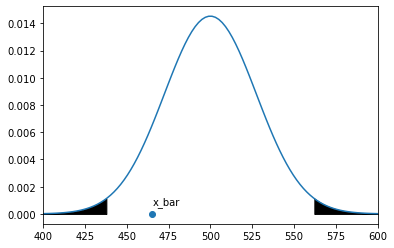

In [13]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = smpl_std(smpls)/len(smpls)**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_crtl_left = pop_mean + (-t_crtl(0.95,10) * std)
t_crtl_right = pop_mean + (t_crtl(0.95,10) * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_crtl_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='black')


# Shading the right rejection region
x2 = np.linspace(t_crtl_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='black')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis


In [14]:
# Conclusion using t test

if(np.abs(t_scr(465.3,500,86.84859110991827,10)) > t_crtl(0.95,10)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [17]:
cnfdnc_lvl = 0.95
alpha = 1 - cnfdnc_lvl

In [18]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t_scr(465.3,500,86.84859110991827,10))))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818092
Fail to reject Null Hypothesis


Q-2: You have developed a new Natural Language Processing Algorithms and done a
user study. You claim that the average rating given by the users is greater than 4 on a
scale of 1 to 5. How do you prove this to your client?

Rating is $$H_1 \gt 4 $$

$$H_0 \leq 4$$

In [22]:
smpls1 = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

In [23]:
smpl_mean(smpls1)

4.25

In [24]:

# Defining the sample and population parameters

smpl_size = 20
sample_mean = 4.25
pop_mean = 4

In [25]:
smpl_std(smpls1)

0.8506963092234007

In [26]:
t_scr(4.25,4,6.4549722436,20)

0.17320508075900828

In [27]:
def t_crtl_1_tail(cnfdnc_lvl,smpl_size):
    alpha = 1 - cnfdnc_lvl
    dgr_frdm = smpl_size-1
    t_crtl = t.ppf(1-alpha, dgr_frdm)
    return t_crtl
t_crtl_1_tail(0.95,20)  

1.729132811521367

Text(4.25, 0.1, 'x_bar')

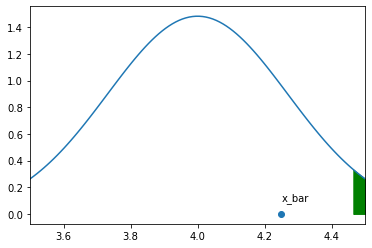

In [28]:
#Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = smpl_std(smpls1) / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_crtl_right = pop_mean + (t_crtl_1_tail(0.95,20) * std)


# Shading the right rejection region
x1 = np.linspace(t_crtl_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [29]:
if(t_scr(4.25,4,6.4549722436,20) > t_crtl_1_tail(0.95,20)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [30]:
cnfdnc_lvl = 0.95
alpha = 1 - cnfdnc_lvl

In [31]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_scr(4.25,4,6.4549722436,20)))
                                
print("p_value is ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value is  0.43124511506712737
Fail to reject Null Hypothesis


Q-3: TATA has developed a better fuel management system for the SUV segment. They
claim that with this system, on average the SUV's mileage is at least 15 km/litre?

average the SUV's mileage is $$H_1 \gt 15 km/litre $$

$$H_0 \leq 15 km/litre$$

In [32]:
smpls2= [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]

In [33]:
smpl_mean(smpls2)

15.098999999999998

In [34]:
# Defining the sample and population parameters

smpl_size = 20
sample_mean = 15.098999999999998
pop_mean = 15

In [35]:
smpl_std(smpls2)

1.0253671999517255

In [36]:
t_scr(15.098999999999998,15,1.0253671999517255,20)

0.4317882018907916

In [37]:
t_crtl_1_tail(0.95,20)

1.729132811521367

Text(15.098999999999998, 0.1, 'x_bar')

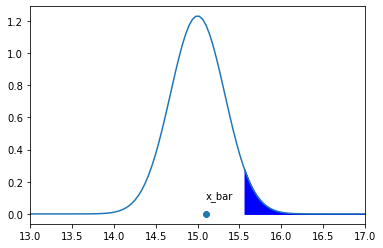

In [38]:
#Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = smpl_std(smpls2) / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_crtl_right = pop_mean + (t_crtl_1_tail(0.95,20) * std)


# Shading the right rejection region
x1 = np.linspace(t_crtl_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='blue')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [39]:
if(t_scr(15.098999999999998,15,1.0253671999517255,20) > t_crtl_1_tail(0.95,20)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [40]:
cnfdnc_lvl = 0.95
alpha = 1 - cnfdnc_lvl

In [41]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_scr(15.098999999999998,15,1.0253671999517255,20)))
                                
print("p_value is ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value is  0.3329476775823499
Fail to reject Null Hypothesis


Q-4: You have developed a new Machine Learning Application and claim that on average
it takes less than 100 ms to predict for any future datapoint. How do you convince your
client about this claim?

average it takes $$H_1 \lt 100ms $$

$$H_0 \geq 100ms/litre$$

In [42]:
smpls3 = [102,103,99,96,97,105,101,93,94,98,100,93,90,110,104]

In [43]:
smpl_mean(smpls3)

99.0

In [34]:
# Defining the sample and population parameters

sample_size = 15
sample_mean = 99.0
pop_mean = 100

In [35]:
smpl_std(smpls3)

5.3718844791323335

In [36]:
t_scr(99.0,100,5.3718844791323335,15)

-0.7209729399901357

In [37]:
t_crtl_1_tail(0.99,15)

2.624494067560231

Text(99.0, 0.02, 'x_bar')

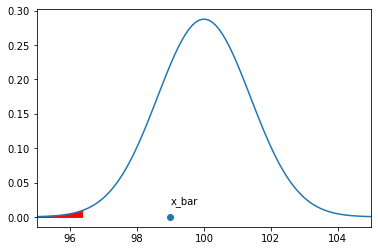

In [38]:
x_min = 95
x_max = 105

mean = pop_mean
std = smpl_std(smpls3) / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_crtl_left = pop_mean + (-t_crtl_1_tail(0.99,15) * std)

x1 = np.linspace(x_min, t_crtl_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [39]:
if(t_scr(99.0,100,5.3718844791323335,15) > t_crtl_1_tail(0.99,15)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [40]:
cnfdnc_lvl = 0.99
alpha = 1 - cnfdnc_lvl

In [42]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_scr(99.0,100,5.3718844791323335,15)))
                                
print("p_value is ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value is  0.23546308190933984
Fail to reject Null Hypothesis
